# 実質GDP

In [1]:
import pandas as pd

In [2]:
gdp_org = pd.read_excel("opendata/API_NY.GDP.MKTP.KD_DS2_en_excel_v2_2252151.xls","Data",header=3)

In [3]:
indicator_name = gdp_org["Indicator Name"].unique()[0]

In [4]:
countries = gdp_org.iloc[:,:2]

In [5]:
gdps = gdp_org.iloc[:,4:].stack(dropna=False).reset_index().rename(columns={"level_0":"country_index","level_1":"year",0:indicator_name})

In [6]:
gdps = pd.merge(countries,gdps,left_index=True,right_on="country_index")
del gdps["country_index"]
gdps

,Country Name,Country Code,year,GDP (constant 2010 US$)
0,Aruba,ABW,1960,NaN
1,Aruba,ABW,1961,NaN
2,Aruba,ABW,1962,NaN
3,Aruba,ABW,1963,NaN
4,Aruba,ABW,1964,NaN
...,...,...,...,...
16099,Zimbabwe,ZWE,2016,1.717755e+10
16100,Zimbabwe,ZWE,2017,1.798558e+10
16101,Zimbabwe,ZWE,2018,1.885423e+10
16102,Zimbabwe,ZWE,2019,1.732704e+10


In [7]:
if gdps.loc[gdps.year==gdps.year.max()]["GDP (constant 2010 US$)"].isna().all(axis=0):
    gdps.drop(gdps.loc[gdps.year==gdps.year.max()].index,inplace=True)

In [8]:
latest_year = gdps["year"].max()
latest_year

'2019'

In [9]:
gdps.loc[gdps.year==latest_year].sort_values("GDP (constant 2010 US$)",ascending=False,na_position="last")

,Country Name,Country Code,year,GDP (constant 2010 US$)
15736,World,WLD,2019,8.484775e+13
5732,High income,HIC,2019,5.395292e+13
10978,OECD members,OED,2019,5.346060e+13
12015,Post-demographic dividend,PST,2019,4.974603e+13
6220,IDA & IBRD total,IBT,2019,3.221988e+13
...,...,...,...,...
13845,Turks and Caicos Islands,TCA,2019,NaN
14272,Turkmenistan,TKM,2019,NaN
15431,"Venezuela, RB",VEN,2019,NaN
15492,British Virgin Islands,VGB,2019,NaN


## 前年比

In [10]:
gdps["前年比"] = gdps["GDP (constant 2010 US$)"].pct_change()
# 最初の年はNAにする
import numpy as np
gdps.loc[gdps.year==gdps.year.min()] = np.nan
gdps

,Country Name,Country Code,year,GDP (constant 2010 US$),前年比
0,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1961,NaN,NaN
2,Aruba,ABW,1962,NaN,NaN
3,Aruba,ABW,1963,NaN,NaN
4,Aruba,ABW,1964,NaN,NaN
...,...,...,...,...,...
16098,Zimbabwe,ZWE,2015,1.704868e+10,0.017799
16099,Zimbabwe,ZWE,2016,1.717755e+10,0.007559
16100,Zimbabwe,ZWE,2017,1.798558e+10,0.047040
16101,Zimbabwe,ZWE,2018,1.885423e+10,0.048297


In [11]:
world_gdp = gdps.loc[gdps["Country Code"]=="WLD"]
world_gdp

,Country Name,Country Code,year,GDP (constant 2010 US$),前年比
15678,World,WLD,1961,1.184877e+13,0.042992
15679,World,WLD,1962,1.250687e+13,0.055541
15680,World,WLD,1963,1.317607e+13,0.053507
15681,World,WLD,1964,1.406065e+13,0.067136
15682,World,WLD,1965,1.483675e+13,0.055196
15683,World,WLD,1966,1.569261e+13,0.057685
15684,World,WLD,1967,1.639657e+13,0.044860
15685,World,WLD,1968,1.743177e+13,0.063135
15686,World,WLD,1969,1.849749e+13,0.061136
15687,World,WLD,1970,1.921147e+13,0.038599


In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


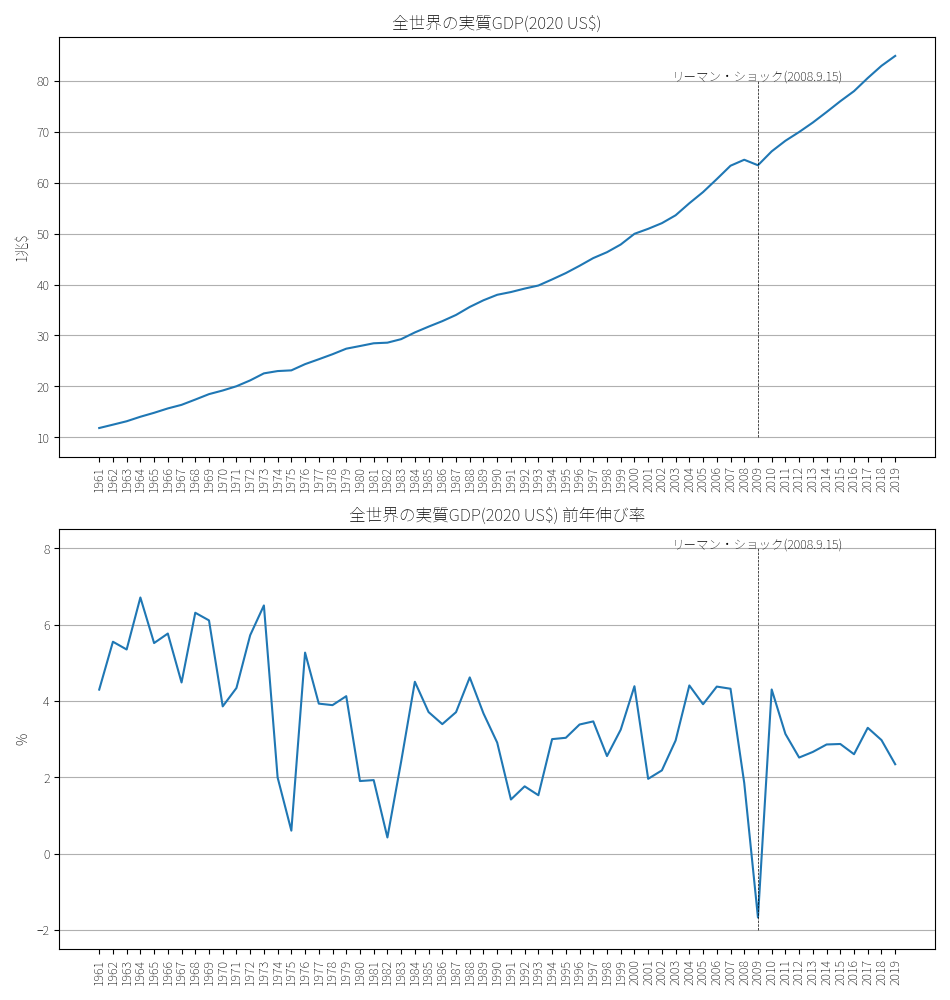

In [13]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("1兆$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["GDP (constant 2010 US$)"]/1000/1000/1000/1000)
plt.plot(["2009","2009"],[10,80], 'k--', lw=0.5)
plt.text("2009",80,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.title("全世界の実質GDP(2020 US$)")

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = world_gdp
plt.plot(world_gdp["year"], world_gdp["前年比"]*100)
plt.plot(["2009","2009"],[-2,8], 'k--', lw=0.5)
plt.text("2009",8,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.title("全世界の実質GDP(2020 US$) 前年伸び率")

plt.tight_layout()

## 国の読み込み

In [14]:
c_org = pd.read_excel("opendata/API_NY.GDP.MKTP.KD_DS2_en_excel_v2_2252151.xls","Metadata - Countries")

In [15]:
countries = c_org.dropna(subset=["Region","IncomeGroup"],how="any")
countries

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [16]:
regions = c_org.Region.dropna().unique()
regions

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [17]:
c_gdps = pd.merge(countries,gdps,on="Country Code",how="inner").drop("TableName",axis=1)
#gdps.join(countries,on="Country Code",how="inner")

In [18]:
print(len(countries))
print(len(c_gdps["Country Name"].unique()))

217
217


## 世界TOP10

In [19]:
gdp_top10_c = pd.DataFrame(c_gdps.loc[c_gdps.year==latest_year].sort_values("GDP (constant 2010 US$)", ascending=False).head(10)[["Country Code","Country Name"]])
c_gdps_top10 = c_gdps[c_gdps["Country Code"].isin(gdp_top10_c["Country Code"])]
c_gdps.iloc[gdp_top10_c.index]


,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,GDP (constant 2010 US$),前年比
12035,USA,North America,High income,NaN,United States,2019,1.830039e+13,0.021612
2182,CHN,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,2019,1.152004e+13,0.059497
5840,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,2019,6.210698e+12,0.006542
3008,DEU,Europe & Central Asia,High income,NaN,Germany,2019,3.944379e+12,0.005555
3834,FRA,Europe & Central Asia,High income,The following irrevocable euro conversion rate...,France,2019,2.971919e+12,0.015086
5309,IND,South Asia,Lower middle income,Fiscal year end: March 31; reporting period fo...,India,2019,2.940157e+12,0.041807
4070,GBR,Europe & Central Asia,High income,NaN,United Kingdom,2019,2.921446e+12,0.014627
1592,BRA,Latin America & Caribbean,Upper middle income,NaN,Brazil,2019,2.347238e+12,0.011366
5663,ITA,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Italy,2019,2.151421e+12,0.003427
1946,CAN,North America,High income,Fiscal year end: March 31; reporting period fo...,Canada,2019,1.939183e+12,0.016560


<IPython.core.display.Javascript object>


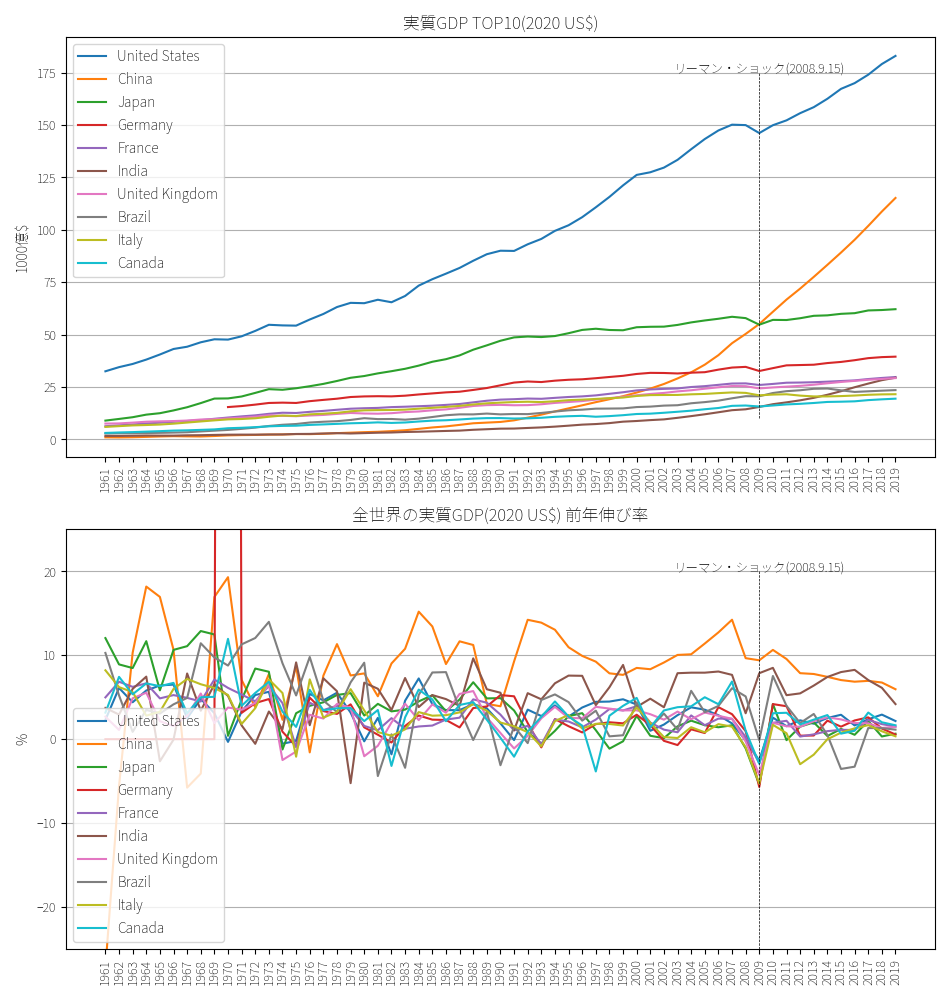

In [20]:
fig = plt.figure(figsize=(9.5,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("1000億$")
plt.yticks(fontsize=9)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"GDP (constant 2010 US$)"]/1000/1000/1000/100,label=c)
plt.plot(["2009","2009"],[10,175], 'k--', lw=0.5)
plt.text("2009",175,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.legend()
plt.title("実質GDP TOP10(2020 US$)")

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("%")
plt.yticks(fontsize=9)
plt.ylim(-25,25)
plt.grid(axis="y")
chart_data = c_gdps_top10
years = chart_data.year.unique()
for c in gdp_top10_c["Country Name"]:
    plt.plot(years, chart_data.loc[chart_data["Country Name"]==c,"前年比"]*100,label=c)
plt.plot(["2009","2009"],[-25,20], 'k--', lw=0.5)
plt.text("2009",20,"リーマン・ショック(2008.9.15)",fontsize=9, ha="center")
plt.title("全世界の実質GDP(2020 US$) 前年伸び率")
plt.legend()

plt.tight_layout()

## 日本

In [21]:
jpn_gdp = c_gdps.loc[c_gdps["Country Code"]=="JPN"]
jpn_gdp

,Country Code,Region,IncomeGroup,SpecialNotes,Country Name,year,GDP (constant 2010 US$),前年比
5782,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1961,8.921054e+11,0.120435
5783,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1962,9.715829e+11,0.089090
5784,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1963,1.053911e+12,0.084736
5785,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1964,1.176973e+12,0.116767
5786,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1965,1.245470e+12,0.058197
5787,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1966,1.377970e+12,0.106386
5788,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1967,1.530679e+12,0.110821
5789,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1968,1.727868e+12,0.128825
5790,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1969,1.943469e+12,0.124779
5791,JPN,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Japan,1970,1.951225e+12,0.003991
